# Evaluated project 6

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Read csv file and convert into dataframe
loan_dataset = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# number of rows and column
loan_dataset.shape

(614, 13)

In [4]:
#getting some information about the data
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Null values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [8]:
#Null values
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
# label encoding
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [10]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [12]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value = 4)

In [13]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

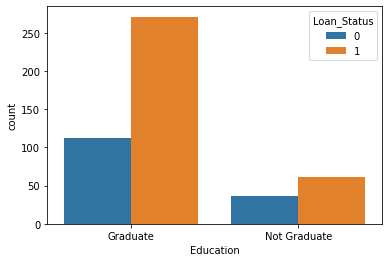

In [14]:
# categorical attributes visualisation
# education and loan status
sns.countplot(x='Education',hue='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

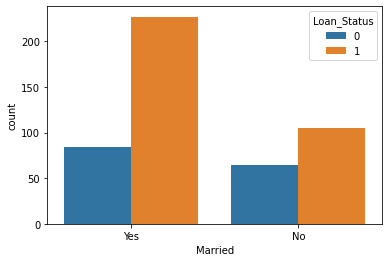

In [15]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

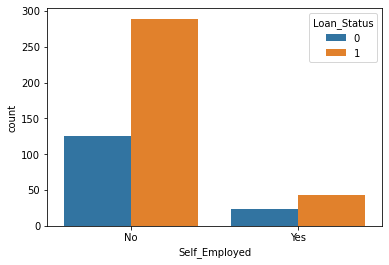

In [16]:
# Self_Employed and loan status
sns.countplot(x='Self_Employed',hue='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Gender', ylabel='count'>

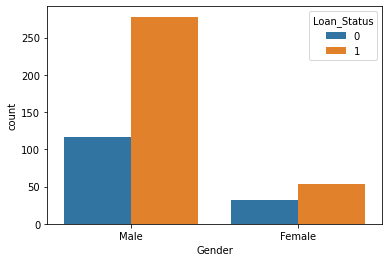

In [19]:
# Gender and loan status
sns.countplot(x='Gender',hue='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

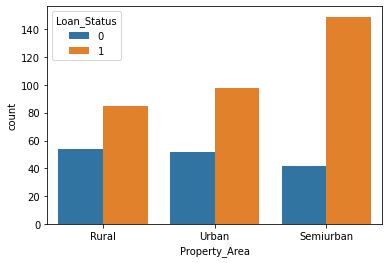

In [23]:
# Property_Area and loan status
sns.countplot(x='Property_Area',hue='Loan_Status', data=loan_dataset)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

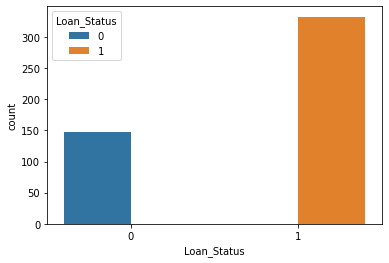

In [24]:
# Loan_Status and loan status
sns.countplot(x='Loan_Status',hue='Loan_Status', data=loan_dataset)

In [47]:
# numerical attributes visualization

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

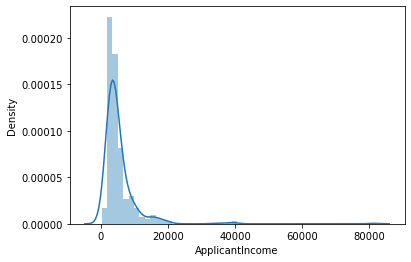

In [48]:
sns.distplot(loan_dataset["ApplicantIncome"])

In [49]:
# apply log transformation to the attribute
loan_dataset["ApplicantIncome"] = np.log(loan_dataset["ApplicantIncome"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

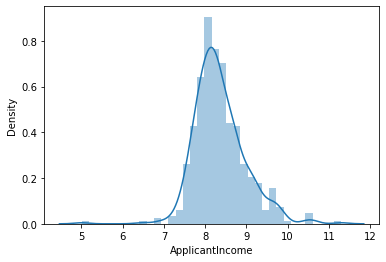

In [50]:
sns.distplot(loan_dataset["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

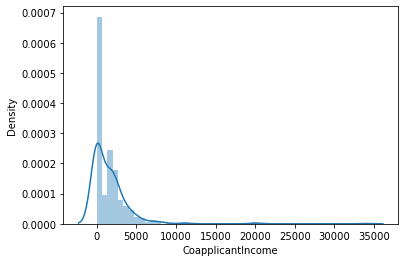

In [51]:
sns.distplot(loan_dataset["CoapplicantIncome"])

In [52]:
# apply log transformation to the attribute
loan_dataset["CoapplicantIncome"] = np.log(loan_dataset["CoapplicantIncome"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

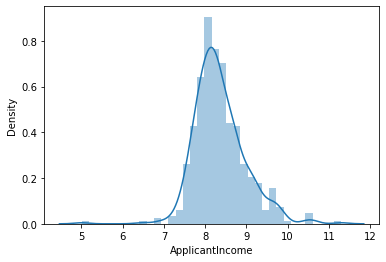

In [54]:
sns.distplot(loan_dataset["ApplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

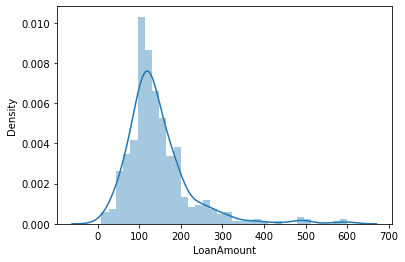

In [55]:
sns.distplot(loan_dataset["LoanAmount"])

In [56]:
loan_dataset["LoanAmount"] = np.log(loan_dataset["LoanAmount"])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

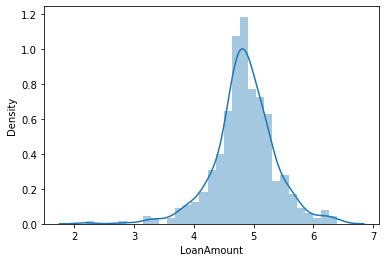

In [57]:
sns.distplot(loan_dataset["LoanAmount"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

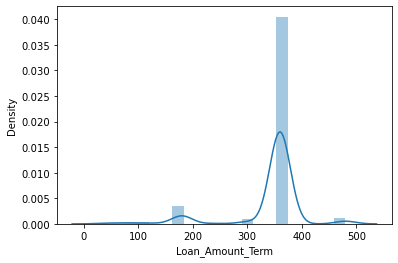

In [59]:
sns.distplot(loan_dataset["Loan_Amount_Term"])

In [60]:
# apply log transformation to the attribute
loan_dataset["Loan_Amount_Term"] = np.log(loan_dataset["Loan_Amount_Term"])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

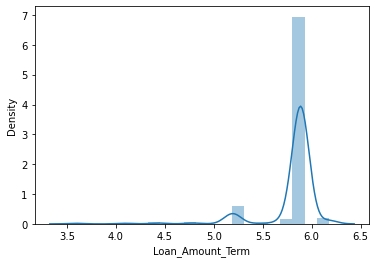

In [61]:
sns.distplot(loan_dataset["Loan_Amount_Term"])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

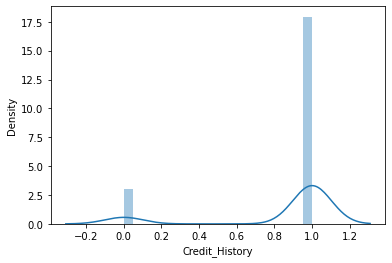

In [62]:
sns.distplot(loan_dataset["Credit_History"])

# Cocrelation Matrix

<AxesSubplot:>

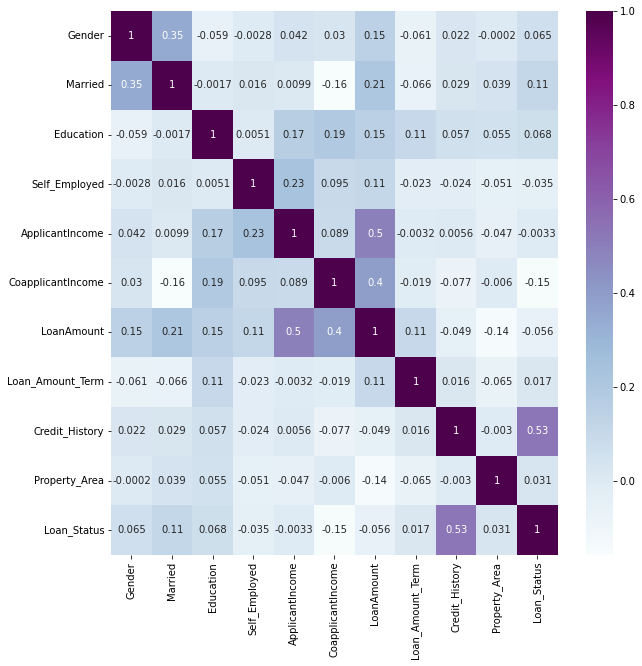

In [66]:
corr = loan_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,cmap="BuPu")

In [25]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [26]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [70]:
#separating the data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis = 1)
Y = loan_dataset['Loan_Status']

In [71]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  Credit_History  \
1         1        1          1          1              0             1.0   
2         1        1          0          1              1             1.0   
3         1        1          0          0              0             1.0   
4         1        0          0          1              0             1.0   
5         1        1          2          1              1             1.0   
..      ...      ...        ...        ...            ...             ...   
609       0        0          0          1              0             1.0   
610       1        1          4          1              0             1.0   
611       1        1          1          1              0             1.0   
612       1        1          2          1              0             1.0   
613       0        0          0          1              1             0.0   

     Property_Area  
1                0  
2                2  
3           

In [72]:
# Train Test Split

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1, stratify=Y,random_state=2)

In [74]:
print(X.shape, X_train.shape, X_test.shape)

(480, 7) (432, 7) (48, 7)


In [75]:
# Training the model:
# Support Vector Machine Model

In [76]:
classifier =svm.SVC(kernel='linear')

In [77]:
#training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

# Model Evaluation

In [78]:
from sklearn.metrics import accuracy_score
# accuracy score on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [79]:
print('Accuracy on training data:', training_data_accuracy)

Accuracy on training data: 0.8055555555555556


In [80]:
# accuracy score on test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

print('Accuracy on test data:', test_data_accuracy)

Accuracy on test data: 0.8333333333333334


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
from sklearn import metrics
model = LogisticRegression()from sklearn
model.fit(X_train,Y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy=', metrics.accuracy_score(lr_prediction,Y_test))

Logistic Regression accuracy= 0.8333333333333334


In [94]:
#classify function
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, stratify=Y,random_state=42)
    model.fit(X_train,Y_train)
    print("Accuracy is",model.score(X_test,Y_test)*100)
    
    score = cross_val_score(model,X,Y, cv=5)
    print("Cross validation is,",np.mean(score)*100)
    

In [95]:
model = DecisionTreeRegressor()
classify(model, X, Y)

Accuracy is 11.7692859402333
Cross validation is, -3.7242834339107933


In [96]:
model = RandomForestRegressor()
classify(model, X, Y)

Accuracy is 16.67407937860269
Cross validation is, 8.506726877059705


# Hyperparameter tuning

In [102]:
model = RandomForestRegressor(n_estimators=50, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, Y)

Accuracy is 28.28511749852837
Cross validation is, 22.66908769950831
